# CO2 B10 cosz0.5 mls result

### Input Parameter Options
    CO2 Band 10 (4400 - 8200)
    vstar = 4400
    nband = 380
    nv = 10000
    dv = 0.001
    cosz = 0.5
    rsfc = 0.0
    include 'mls75.pro'
    CO2 = 400    

    ng = 6
    nref = 2
    p_refs = / 10, 300 /
    t_refs = / 250, 250 /
    ng_refs = / 3, 3 /
    ng_adju = / 0, 0 /
    wgt = / 2*0.85, 0.8, 0.75, 0.65, 0.85 / 
    option_klin = 1
    klin = 2.0e-23
    option_k_lookup = 1
    nl = 52
    nt = 5

### Note
    ~_flux    <- LBL, LBLk (with ktable), PAR (CLIRAD) for each ig + total + diff.
    ~_heat   <- LBL, LBLk (with ktable), PAR (CLIRAD) for each ig + total + diff.

In [1]:
import numpy as np
from pandas import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as display

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

path = 'cosz0.5/mls/clirad/out/'
fname = 'CO2_B10_cosz0.5_mls75_'

### Flux

In [2]:
flx = pd.read_table(path+'new_ng6_all.flx',header=None,sep="\s+",keep_default_na=False,index_col=[0],
                    names=['hPa','LBL_g1','LBLk_g1','PAR_g1','LBL_g2','LBLk_g2','PAR_g2','LBL_g3','LBLk_g3','PAR_g3',
                           'LBL_g4','LBLk_g4','PAR_g4','LBL_g5','LBLk_g5','PAR_g5','LBL_g6','LBLk_g6','PAR_g6',
                           'LBL_tot','LBLk_tot','PAR_tot','LBLk - LBL','PAR - LBL'])

pd.concat([flx[flx.index == 0.], flx[flx.index == 1013.]])

,LBL_g1,LBLk_g1,PAR_g1,LBL_g2,LBLk_g2,PAR_g2,LBL_g3,LBLk_g3,PAR_g3,LBL_g4,LBLk_g4,PAR_g4,LBL_g5,LBLk_g5,PAR_g5,LBL_g6,LBLk_g6,PAR_g6,LBL_tot,LBLk_tot,PAR_tot,LBLk - LBL,PAR - LBL
hPa,,,,,,,,,,,,,,,,,,,,,,,
0.0,0.02677,0.02677,0.02677,0.08506,0.08506,0.08506,0.34181,0.34181,0.34181,0.51654,0.51654,0.51654,2.89938,2.89938,2.89938,110.00494,110.00494,110.00494,113.87450,113.87450,113.87450,0.00000,0.00000
1013.0,0.00000,0.00000,0.00000,0.00031,0.00000,0.00000,0.04773,0.00000,0.00000,0.00174,0.00002,0.00002,0.94488,0.85074,0.85074,108.75559,108.82698,108.82698,109.75025,109.67774,109.67774,-0.07251,-0.07251


In [3]:
## save flux data to excel
sav = pd.DataFrame(flx)
sav.to_csv(fname+"flux.csv",header=True,index=True)
fn = fname+'flux.csv'
sav.to_csv(fn)
html_download = '''
Download: <a href="./{fname}">{fname}</a>'''.format(fname=fn)
display.display(display.HTML(html_download))

### Figures

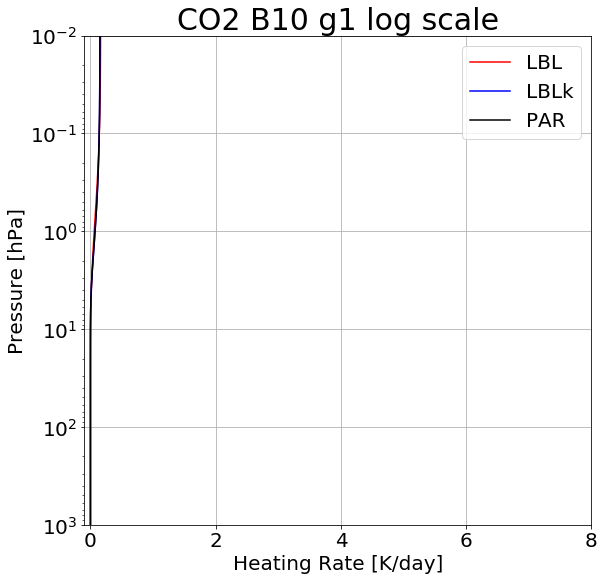

In [4]:
htr = pd.read_table(path+'new_ng6_all.htr',header=None,sep="\s+",keep_default_na=False,
                    names=['hPa','LBL_g1','LBLk_g1','PAR_g1','LBL_g2','LBLk_g2','PAR_g2','LBL_g3','LBLk_g3','PAR_g3',
                          'LBL_g4','LBLk_g4','PAR_g4','LBL_g5','LBLk_g5','PAR_g5','LBL_g6','LBLk_g6','PAR_g6',
                          'LBL_tot','LBLk_tot','PAR_tot','LBLk - LBL','PAR - LBL'])

params = {'figure.figsize': (20,9),'legend.fontsize': 20,'axes.labelsize': 20,'axes.titlesize': 30,'xtick.labelsize': 20,'ytick.labelsize': 20}
plt.rcParams.update(params)

max1 = 8
max2 = 0.5

# log scale
plt.subplot(1,2,1)
plt.axis([-0.1,max1,1000,0.01])
plt.grid()
plt.title('CO2 B10 g1 log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBL_g1'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLk_g1'],htr['hPa'],label='LBLk',color='blue')
plt.plot(htr['PAR_g1'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

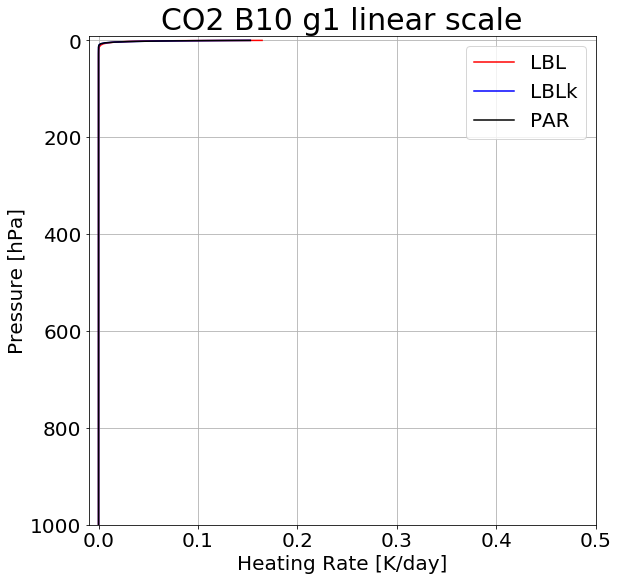

In [5]:
# linear scale
plt.subplot(1,2,2)
plt.axis([-0.01,max2,1000,-10])
plt.grid()
plt.title('CO2 B10 g1 linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBL_g1'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLk_g1'],htr['hPa'],label='LBLk',color='blue')
plt.plot(htr['PAR_g1'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

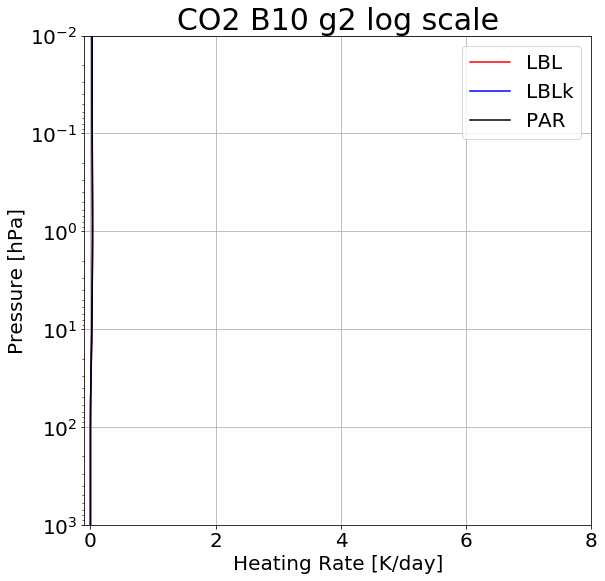

In [6]:
# log scale
plt.subplot(1,2,1)
plt.axis([-0.1,max1,1000,0.01])
plt.grid()
plt.title('CO2 B10 g2 log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBL_g2'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLk_g2'],htr['hPa'],label='LBLk',color='blue')
plt.plot(htr['PAR_g2'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

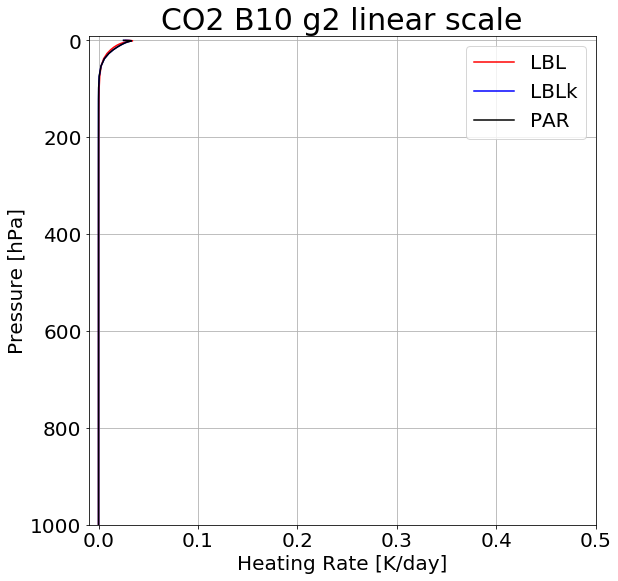

In [7]:
# linear scale
plt.subplot(1,2,2)
plt.axis([-0.01,max2,1000,-10])
plt.grid()
plt.title('CO2 B10 g2 linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBL_g2'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLk_g2'],htr['hPa'],label='LBLk',color='blue')
plt.plot(htr['PAR_g2'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

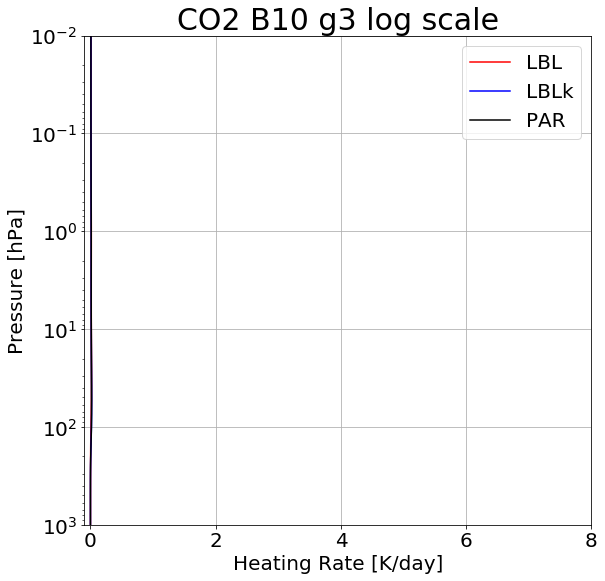

In [8]:
# log scale
plt.subplot(1,2,1)
plt.axis([-0.1,max1,1000,0.01])
plt.grid()
plt.title('CO2 B10 g3 log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBL_g3'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLk_g3'],htr['hPa'],label='LBLk',color='blue')
plt.plot(htr['PAR_g3'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

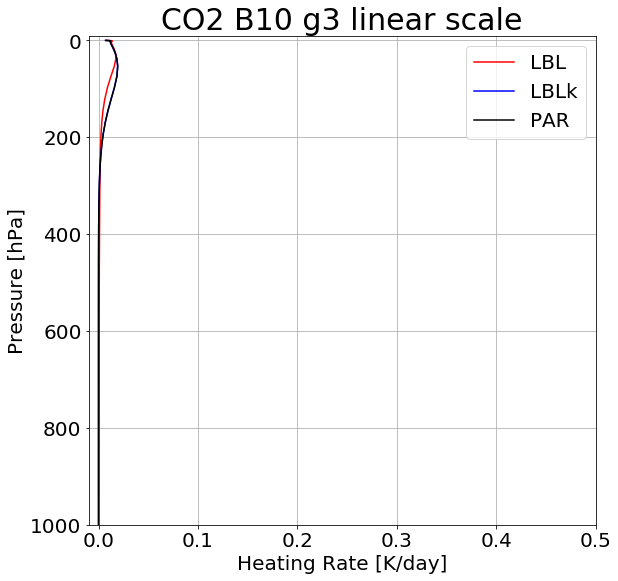

In [9]:
# linear scale
plt.subplot(1,2,2)
plt.axis([-0.01,max2,1000,-10])
plt.grid()
plt.title('CO2 B10 g3 linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBL_g3'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLk_g3'],htr['hPa'],label='LBLk',color='blue')
plt.plot(htr['PAR_g3'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

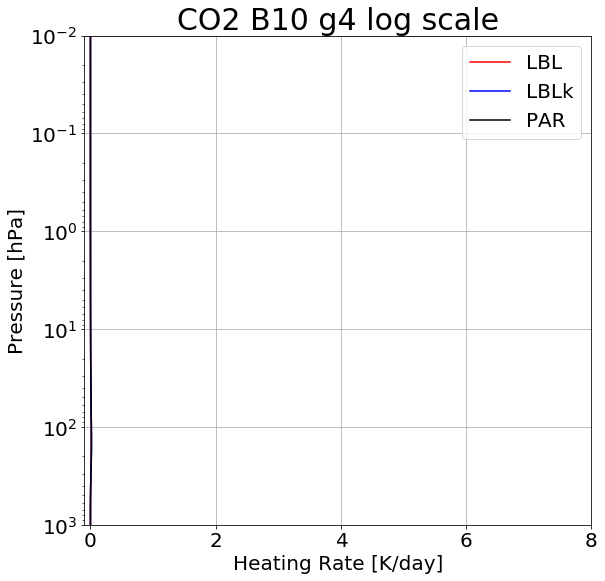

In [10]:
# log scale
plt.subplot(1,2,1)
plt.axis([-0.1,max1,1000,0.01])
plt.grid()
plt.title('CO2 B10 g4 log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBL_g4'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLk_g4'],htr['hPa'],label='LBLk',color='blue')
plt.plot(htr['PAR_g4'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

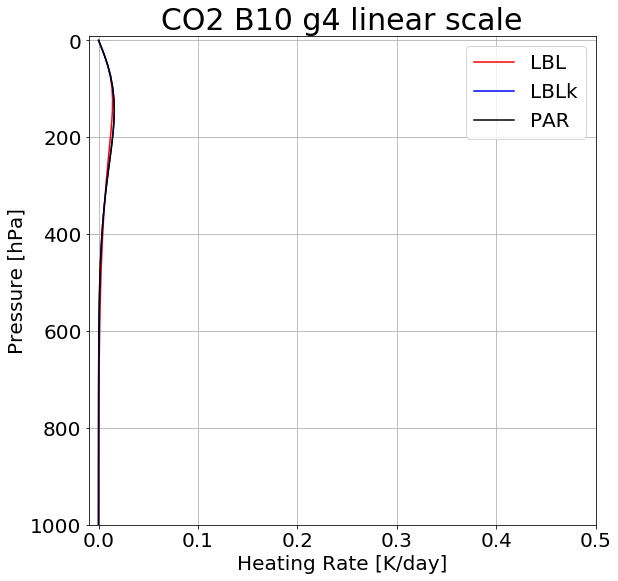

In [11]:
# linear scale
plt.subplot(1,2,2)
plt.axis([-0.01,max2,1000,-10])
plt.grid()
plt.title('CO2 B10 g4 linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBL_g4'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLk_g4'],htr['hPa'],label='LBLk',color='blue')
plt.plot(htr['PAR_g4'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

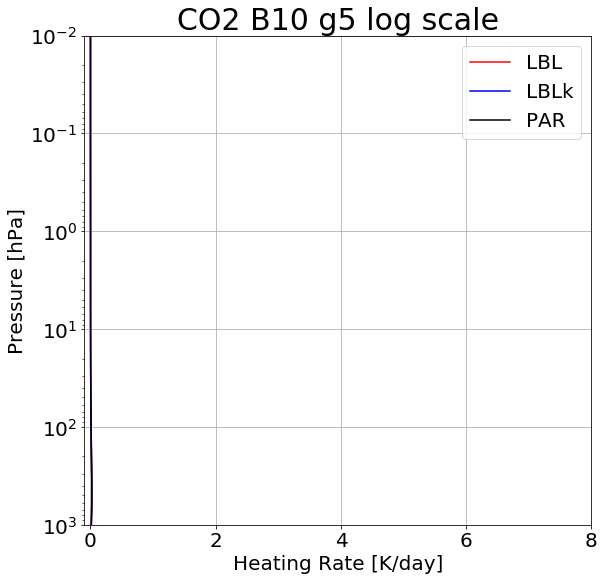

In [12]:
# log scale
plt.subplot(1,2,1)
plt.axis([-0.1,max1,1000,0.01])
plt.grid()
plt.title('CO2 B10 g5 log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBL_g5'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLk_g5'],htr['hPa'],label='LBLk',color='blue')
plt.plot(htr['PAR_g5'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

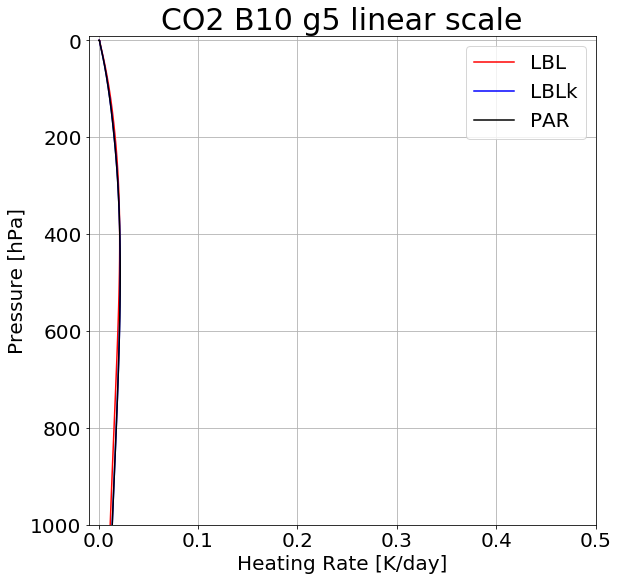

In [13]:
# linear scale
plt.subplot(1,2,2)
plt.axis([-0.01,max2,1000,-10])
plt.grid()
plt.title('CO2 B10 g5 linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBL_g5'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLk_g5'],htr['hPa'],label='LBLk',color='blue')
plt.plot(htr['PAR_g5'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

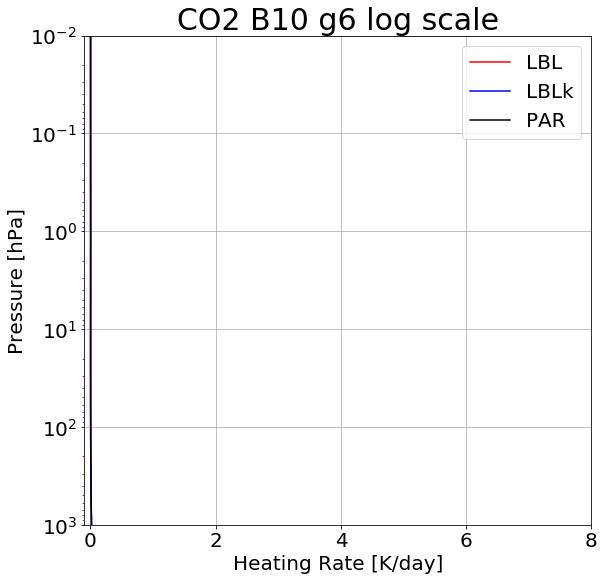

In [14]:
# log scale
plt.subplot(1,2,1)
plt.axis([-0.1,max1,1000,0.01])
plt.grid()
plt.title('CO2 B10 g6 log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBL_g6'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLk_g6'],htr['hPa'],label='LBLk',color='blue')
plt.plot(htr['PAR_g6'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

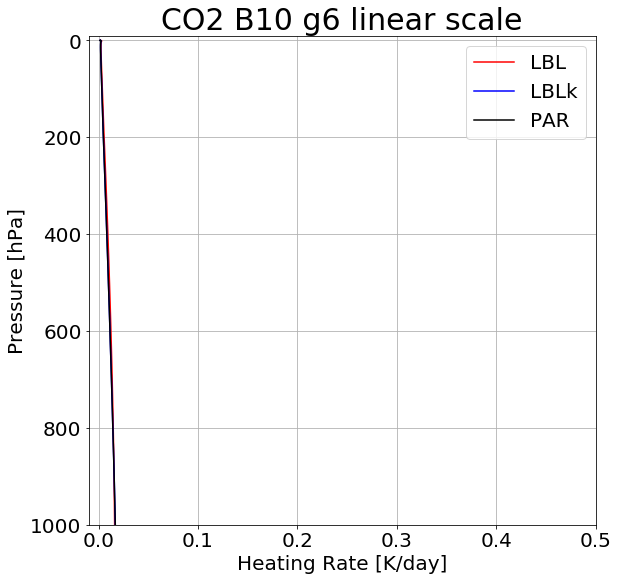

In [15]:
# linear scale
plt.subplot(1,2,2)
plt.axis([-0.01,max2,1000,-10])
plt.grid()
plt.title('CO2 B10 g6 linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBL_g6'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLk_g6'],htr['hPa'],label='LBLk',color='blue')
plt.plot(htr['PAR_g6'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

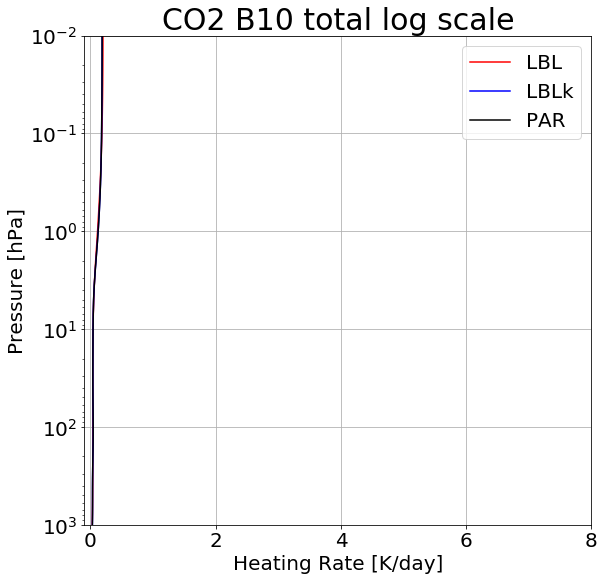

In [16]:
# log scale
plt.subplot(1,2,1)
plt.axis([-0.1,max1,1000,0.01])
plt.grid()
plt.title('CO2 B10 total log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBL_tot'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLk_tot'],htr['hPa'],label='LBLk',color='blue')
plt.plot(htr['PAR_tot'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

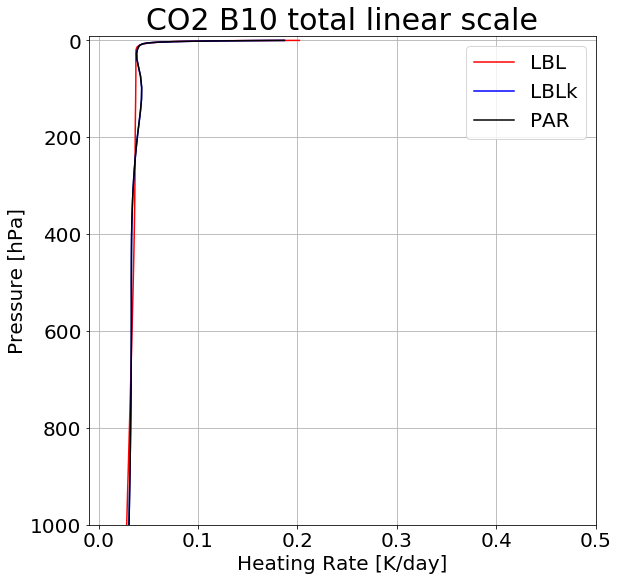

In [17]:
# linear scale
plt.subplot(1,2,2)
plt.axis([-0.01,max2,1000,-10])
plt.grid()
plt.title('CO2 B10 total linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBL_tot'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLk_tot'],htr['hPa'],label='LBLk',color='blue')
plt.plot(htr['PAR_tot'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

In [18]:
## save heating rate to excel for lbl
sav = pd.DataFrame(htr)
sav.to_csv(fname+"heat.csv",header=True,index=False)
fn = fname+'heat.csv'
sav.to_csv(fn)
html_download = '''
Download: <a href="./{fname}">{fname}</a>'''.format(fname=fn)
display.display(display.HTML(html_download))

In [19]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')